In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

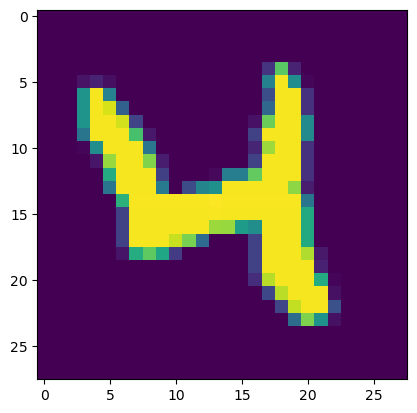

In [3]:
plt.imshow(x_train[20])
print(x_train[20])

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train.shape
# we can use the mean and variance to make normalization
#tf.keras.layers.Normalize()

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
def create_model(num_neurons, num_layers, activation, shape):
    model = Sequential()
    for i in range(num_layers):
        layer_name = 'layer' + str(i + 1)
        if (i == num_layers - 1):
            model.add(Dense(10, activation='softmax', name=layer_name))
            return model
        model.add(Dense(num_neurons, activation=activation, name=layer_name))

    return model
    

In [7]:
def fit_model(model, x_train, y_train, num_epochs):
    model.fit(
        x_train,
        y_train,
        epochs = num_epochs,
        verbose=2
    )
    return

In [8]:
num_neurons_list = [2**x for x in range(2, 11)]
num_layers_list = [x for x in range(2, 11)]
num_epochs_list = [x for x in range(1, 22)]
activations_list = ["sigmoid", "tanh", "relu", "elu", "selu"]

In [ ]:
# for graphing purposes
selected_neurons_num = []
selected_layers_num = []
selected_epochs_num = []
selected_activations = []
accuracies = []
#
for i in range(len(activations_list)):
    num_neurons = 128
    #num_neurons = random.choice(num_neurons_list)
    selected_neurons_num.append(num_neurons)
    num_layers = 3
    #num_layers = random.choice(num_layers_list)
    selected_layers_num.append(num_layers)
    num_epochs = 3
    #num_epochs = random.choice(num_epochs_list)
    selected_epochs_num.append(num_epochs)
    #activation = random.choice(activations_list)
    activation = activations_list[i]
    selected_activations.append(activation)

    model = create_model(num_neurons, num_layers, activation, (784,))
    model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics=['accuracy'])
    fit_model(model, x_train, y_train, num_epochs)
    val_loss, val_accuracy = model.evaluate(x_test, y_test)
    accuracies.append(val_accuracy)
    print(f"#Layers {num_layers}, #Neurons {num_neurons}, Activation: {activation}, Epochs: {num_epochs}, Accuracy: {val_accuracy}\n")

# Plot between selected_layers_num and accuracies
# after holding all variables constant except for number of layers
plt.figure()
plt.plot(selected_layers_num, accuracies, 'o')
plt.xlabel('# Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. # Layers')
plt.show()

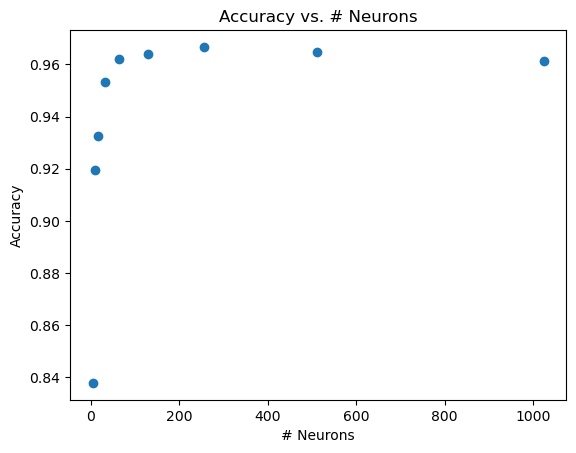

In [12]:
# Plot between selected_neurons_num and accuracies
# after holding all variables constant except for number of neurons
plt.figure()
plt.plot(selected_neurons_num, accuracies, 'o')
plt.xlabel('# Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. # Neurons')
plt.show()

In [ ]:

# Plot between selected_epochs_num and accuracies
plt.figure()
plt.plot(selected_epochs_num, accuracies, 'o')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. # Epochs')
plt.show()



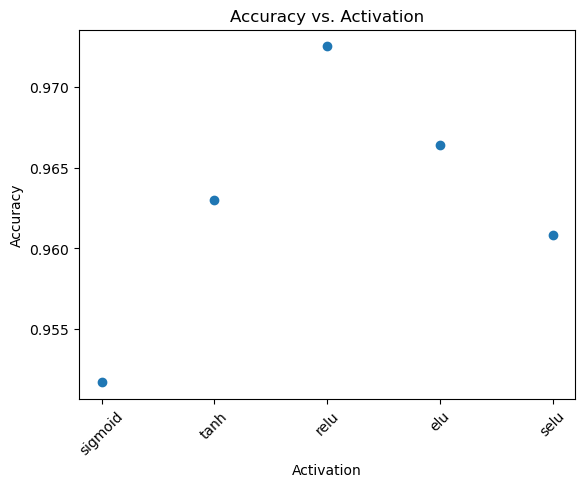

In [16]:
# Plot between activation list and accuracy
plt.figure()
plt.plot(selected_activations, accuracies, 'o')
plt.xlabel('Activation')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Activation')
plt.xticks(rotation=45)
plt.show()

# 1-How did changing the number of layers affect the model?the accuracy increased after increasing the number of layers from 2 to 3 as shown in the above graph, but after additional increase, accuracy started to fluctuate and took more time to fit the data.
### Conclusion
increasing the number of layers could to data overfitting which leads to lower accuracy

# 2-How did the number of neurons in a layer impact performance?
As elaborated in the above graph, as increasing the number of neurons, the accuracy increases relatively.
### H3 Conclusion
1- If neurons number is too small, the model fail to fit the data correctly and overfits the data.
2- We could say that there is an accuracy boundary that we could not overcome even if increasing the number of neuron. When a satisfactory accuracy reached stop increasing the number of neurons because if you did not the time taken by the model will increase and accuracy will not.

# Did any of the activation functions lead to better or worse results than 'relu'?
No, they didn't

In [ ]:
predictions = model.predict([x_test])
print(predictions)

In [33]:
print(np.argmax(predictions[2]))

NameError: name 'predictions' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

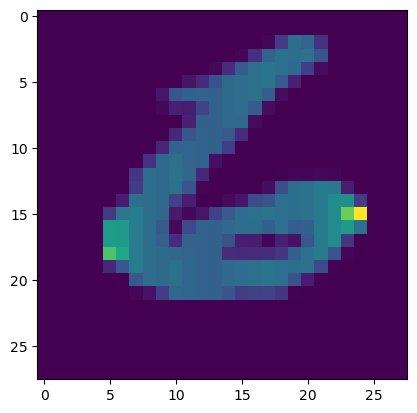

In [8]:
plt.imshow(x_test[9999])
plt.show